In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_breast_cancer
import numpy as np

# Dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn-datasets-load-breast-cancer

In [2]:
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.25)

In [3]:
X.shape

(569, 30)

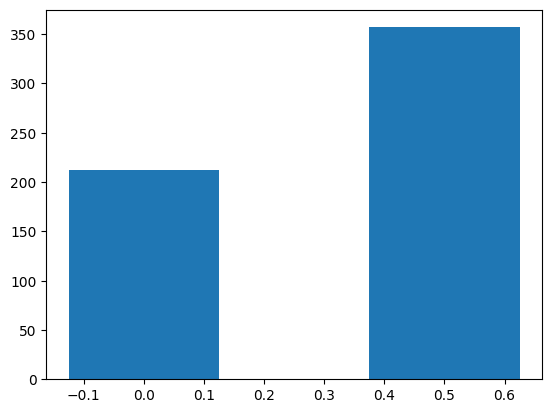

In [4]:
plt.hist(y, rwidth=0.5, align='left', bins=2);

In [5]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print('DecisionTreeClassifier:\n')
print('F1 weighted: {0}'.format(f1_score(y_test,y_pred_tree,average='weighted')))
confusion_matrix(y_test,y_pred_tree)

DecisionTreeClassifier:

F1 weighted: 0.95113521734576


array([[51,  3],
       [ 4, 85]], dtype=int64)

In [6]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, 
                            bootstrap=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('BaggingClassifier\n')
print('F1 weighted: {0}'.format(f1_score(y_test,y_pred,average='weighted')))
confusion_matrix(y_test,y_pred)

BaggingClassifier

F1 weighted: 0.958041958041958


array([[51,  3],
       [ 3, 86]], dtype=int64)

In [7]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

print('RandomForestClassifier\n')
print('F1 weighted: {0}'.format(f1_score(y_test,y_pred_rf,average='weighted')))
confusion_matrix(y_test,y_pred_rf)

RandomForestClassifier

F1 weighted: 0.9649692447165427


array([[51,  3],
       [ 2, 87]], dtype=int64)

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

ext_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42, n_jobs=-1)
ext_clf.fit(X_train, y_train)

y_pred_rf = ext_clf.predict(X_test)

print('ExtraTreesClassifier\n')
print('F1 weighted: {0}'.format(f1_score(y_test,y_pred_rf,average='weighted')))
confusion_matrix(y_test,y_pred_rf)

ExtraTreesClassifier

F1 weighted: 0.9789815468299258


array([[52,  2],
       [ 1, 88]], dtype=int64)

# OOB Evaluation

In [9]:
bag_clf = BaggingClassifier( DecisionTreeClassifier(), n_estimators=500,
                             bootstrap=True, oob_score=True, random_state=42, n_jobs=-1)
bag_clf.fit(X_train, y_train)
print('Accuracy based on OOB evaluation:')
bag_clf.oob_score_

Accuracy based on OOB evaluation:


0.9530516431924883

In [10]:
from sklearn.metrics import accuracy_score
print('Accuracy using Test Dataset:')
accuracy_score(y_test,bag_clf.predict(X_test))

Accuracy using Test Dataset:


0.958041958041958

# Feature importance evaluation using Random Forest

In [11]:
print('Feature importances:')
print(rnd_clf.feature_importances_)
print('sum = {0}'.format(sum(rnd_clf.feature_importances_)))

Feature importances:
[0.04023241 0.01625588 0.0438671  0.04063159 0.00701284 0.01192543
 0.05386512 0.11659346 0.00337807 0.00398963 0.01737132 0.00427006
 0.01125497 0.04070001 0.00343413 0.00413121 0.00674251 0.00474479
 0.00414016 0.00549949 0.0814742  0.01937547 0.1038412  0.12010405
 0.01347941 0.01250398 0.03745833 0.15200546 0.01385936 0.00585835]
sum = 1.0000000000000002


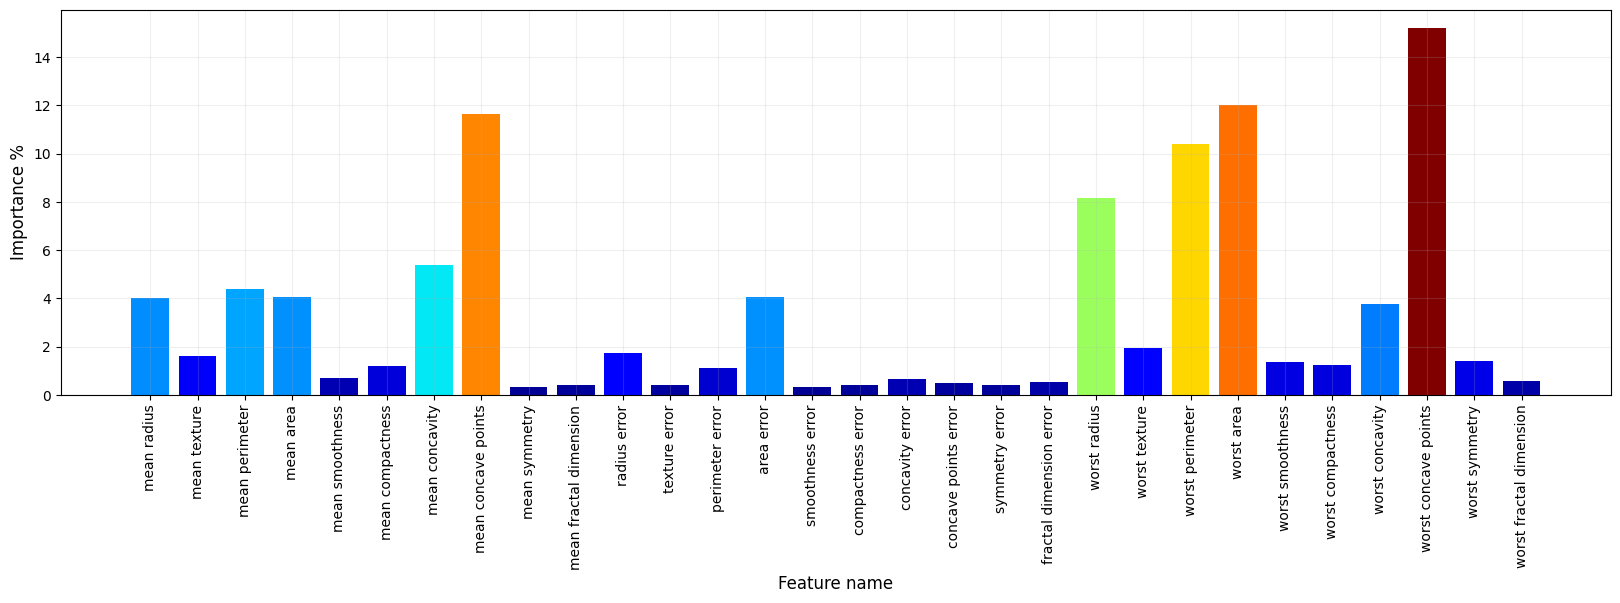

In [12]:
import matplotlib.cm as cm
from matplotlib.colors import Normalize

importance_percent = 100*rnd_clf.feature_importances_
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=max(importance_percent))

fig,ax=plt.subplots(1,1,figsize=(20,5))
ax.bar(data['feature_names'],importance_percent,color=my_cmap(my_norm(importance_percent)))
ax.grid(alpha=0.2)
plt.xticks(rotation = 90)
ax.set_xlabel('Feature name',fontsize=12)
ax.set_ylabel('Importance %',fontsize=12)
plt.show()

In [13]:
features = ['worst area','worst concave points']
idx = [np.where(data['feature_names']==features[0])[0][0], np.where(data['feature_names']==features[1])[0][0]]

target_names = ['malignant', 'benign']
colors = ['orangered','lime']

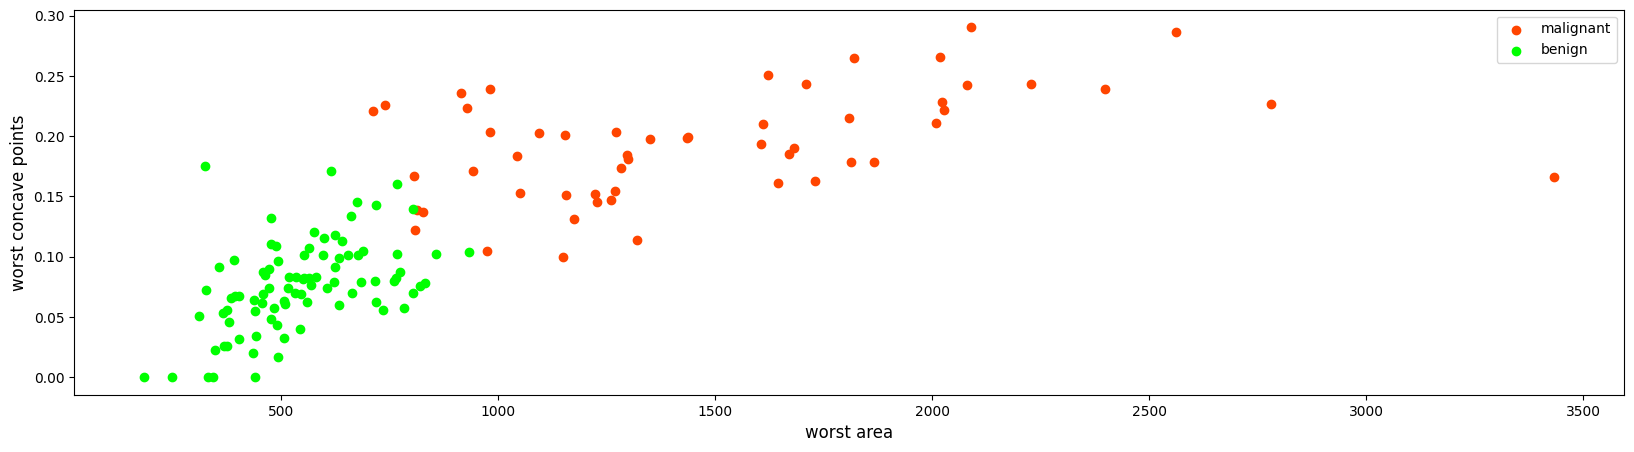

In [14]:
fig,ax=plt.subplots(1,1,figsize=(20,5))

for i in range(len(target_names)):
    idy = np.where(y_test==i)
    ax.scatter(X_test[idy,idx[0]], X_test[idy,idx[1]],label=target_names[i],c=colors[i])
ax.set_xlabel(features[0],fontsize=12)
ax.set_ylabel(features[1],fontsize=12)

ax.legend()
plt.show()